In [9]:
# import packages
import pandas as pd
import seeq.spy as spy
import matplotlib.pyplot as plt
import numpy as np

# import local functions
from helpers import time_between_null_groups, eval_failures
#from helpers import eval_failures

In [10]:
# connect to API
spy.login(url='https://chevron.seeq.site/', credentials_file='credentials.key', force=False, request_origin_label="rewick_script")

In [11]:
# get today's date
from datetime import date
today = date.today()

In [4]:
# define variables
tag = '74TI5096' #'74TI5096'
start_date = '2015-01-01'
end_date = str(today)#'2025-02-01'
sampling_rate = '4W'

In [5]:
# get data from seeq
results = spy.search({'Name': tag})
results = results[results['Name']==tag]

data=spy.pull(results.iloc[0], start=start_date, end=end_date, header='Name')#, header='ID')

,ID,Type,Name,Time,Count,Pages,Data Processed,Result
0,0EF96446-A235-EE20-A8B0-9BAF71E60276,StoredSignal,74TI5096,00:00:58.73,359325,1,86 MB,Success


In [6]:
# take a quick peek at the data
data

,74TI5096
2015-01-01 00:00:00-06:00,NaN
2015-01-01 00:15:00-06:00,NaN
2015-01-01 00:30:00-06:00,NaN
2015-01-01 00:45:00-06:00,NaN
2015-01-01 01:00:00-06:00,NaN
...,...
2025-03-31 23:00:00-05:00,775.469055
2025-03-31 23:15:00-05:00,776.102466
2025-03-31 23:30:00-05:00,777.242554
2025-03-31 23:45:00-05:00,776.989136


<AxesSubplot:>

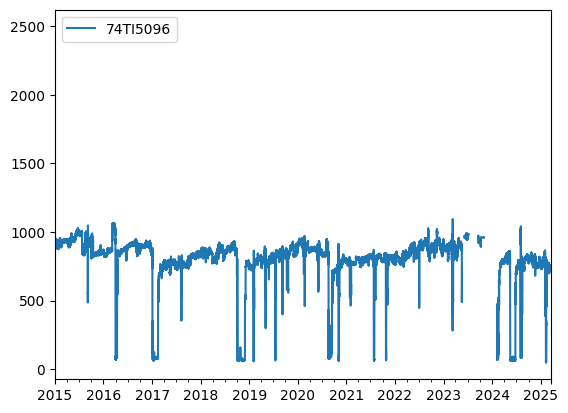

In [7]:
# visualize the temps
data.plot()

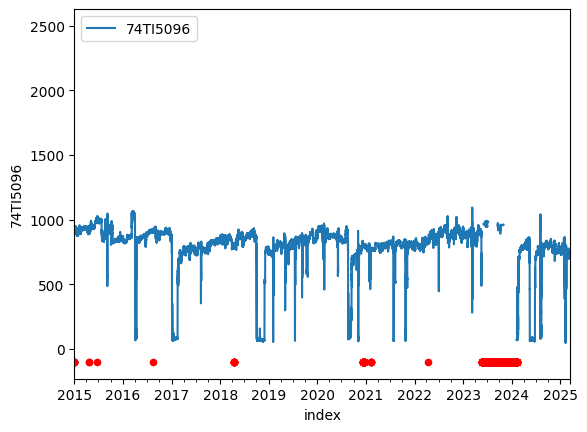

In [8]:
# let's see what the NULL values look like, plot them in red
rows_with_nan = data[data.isnull().any(axis=1)]
rows_with_nan = rows_with_nan.fillna(-100)
rows_with_nan = rows_with_nan.reset_index()
fig, ax = plt.subplots()
data.plot(ax=ax)
rows_with_nan.plot.scatter(x='index', y=tag, ax=ax, color='red')

plt.show()

In [9]:
# look at the null groups and time between them

type(pd.Series(data[tag]))
time_between_null_groups(pd.Series(data[tag]))

(0    106 days 08:15:00
 1     66 days 23:00:00
 2    420 days 04:45:00
 3    609 days 04:30:00
 4    970 days 05:30:00
 5     46 days 05:30:00
 6    434 days 02:00:00
 7    400 days 14:00:00
 8      0 days 02:00:00
 9      0 days 01:00:00
 10     0 days 06:30:00
 11    12 days 16:30:00
 12     0 days 03:15:00
 13     0 days 01:15:00
 14     0 days 00:30:00
 15     0 days 17:45:00
 16     0 days 14:15:00
 17     3 days 17:30:00
 18     0 days 02:30:00
 19     0 days 18:00:00
 dtype: timedelta64[ns],
 21)

In [10]:
# too many null groups, let's resample weekly to see if we can filter out small blips

sampling_avg = data.resample(sampling_rate).mean()
print(sampling_avg)

                             74TI5096
2015-01-04 00:00:00-06:00  931.399610
2015-02-01 00:00:00-06:00  908.626952
2015-03-01 00:00:00-06:00  921.460462
2015-03-29 00:00:00-05:00  934.424921
2015-04-26 00:00:00-05:00  918.880734
...                               ...
2024-12-22 00:00:00-06:00  761.090405
2025-01-19 00:00:00-06:00  762.077273
2025-02-16 00:00:00-06:00  676.205510
2025-03-16 00:00:00-05:00  732.408291
2025-04-13 00:00:00-05:00  739.081268

[135 rows x 1 columns]


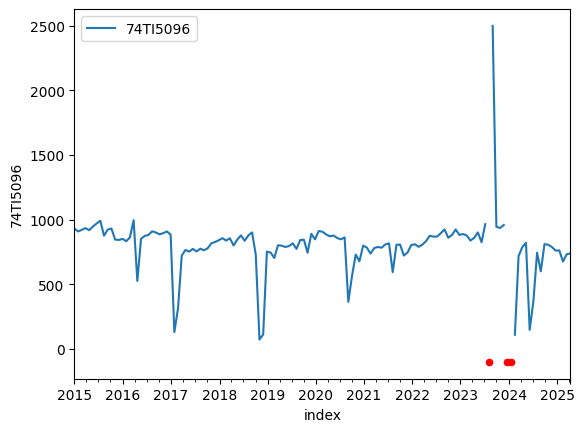

In [11]:
# plot the filtered averages
rows_with_nan = sampling_avg[sampling_avg.isnull().any(axis=1)]
rows_with_nan = rows_with_nan.fillna(-100)
rows_with_nan = rows_with_nan.reset_index()
fig, ax = plt.subplots()
sampling_avg.plot(ax=ax)
rows_with_nan.plot.scatter(x='index', y=tag, ax=ax, color='red')

plt.savefig(tag)
plt.show()

In [12]:
# calculate the number of failures and average time between failures
time_bw_fail = time_between_null_groups(pd.Series(sampling_avg[tag]))
num_days = time_bw_fail[0] / np.timedelta64(1, 'D')

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Calculate the difference in years
years_difference = (end_date - start_date) / pd.Timedelta(days=365.25)

#need to troubleshoot:
#print('For tag {} there are {} failures in {:.1f} years with average time between failures of {:.1f} days'.format(tag,time_bw_fail[1], years_difference, num_days[0]))
print('For tag {} there are {} failures in {:.1f} years'.format(tag,time_bw_fail[1], years_difference))

For tag 74TI5096 there are 2 failures in 10.2 years


(2, 10.209445585215606)

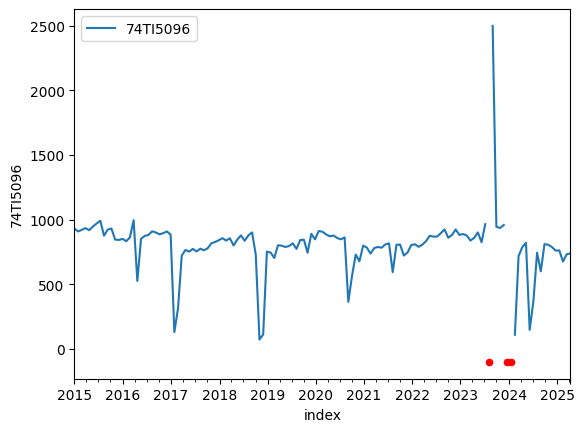

In [13]:
eval_failures(tag, start_date, end_date, sampling_rate)

## Now let's generalize in a function so we can run on any tags we want

For tag 74TI5092 there are 0 failures in 10.2 years
For tag 74TI5093 there are 2 failures in 10.2 years
For tag 74TI5094 there are 1 failures in 10.2 years
For tag 74TI5095 there are 1 failures in 10.2 years
For tag 74TI5096 there are 2 failures in 10.2 years
For tag 74TI5097 there are 2 failures in 10.2 years
For tag 74TI5098 there are 1 failures in 10.2 years
For tag 74TI5099 there are 2 failures in 10.2 years
For tag 74TI5100 there are 1 failures in 10.2 years
For tag 74TI5101 there are 1 failures in 10.2 years
For tag 74TI5102 there are 2 failures in 10.2 years
For tag 74TI5103 there are 1 failures in 10.2 years
For tag 74TI5104 there are 0 failures in 10.2 years
For tag 74TI5105 there are 1 failures in 10.2 years
For tag 74TI5106 there are 5 failures in 10.2 years
For tag 74TI5107 there are 1 failures in 10.2 years
For tag 74TI5108 there are 0 failures in 10.2 years
For tag 74TI5109 there are 1 failures in 10.2 years
For tag 74TI5110 there are 1 failures in 10.2 years
For tag 74TI

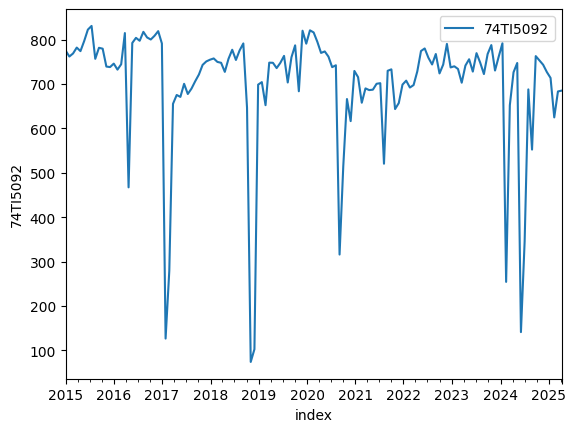

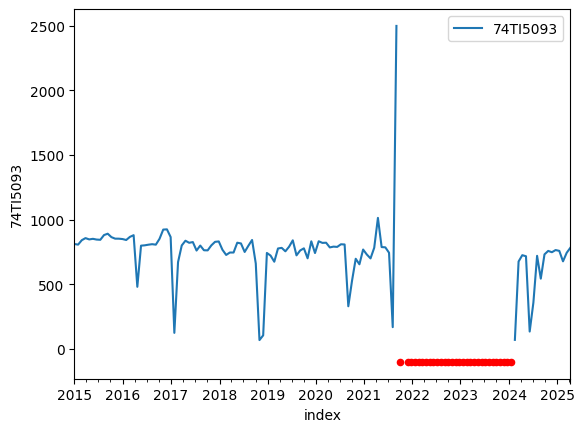

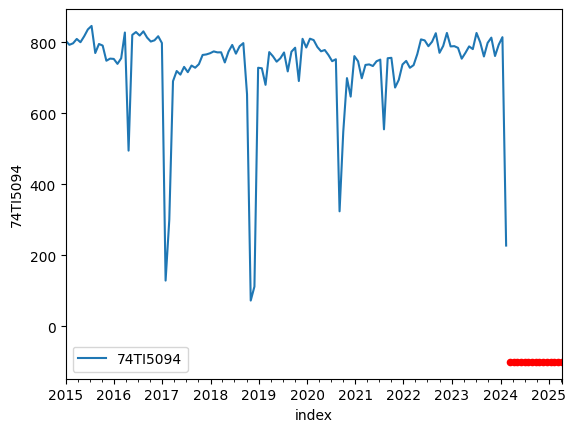

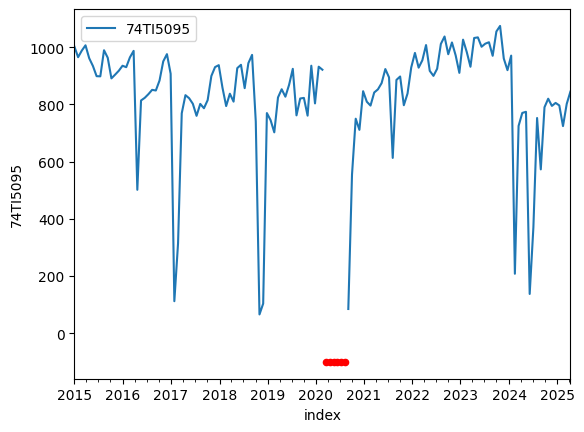

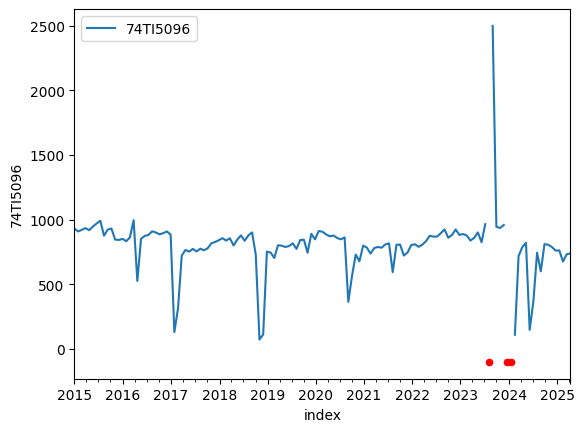

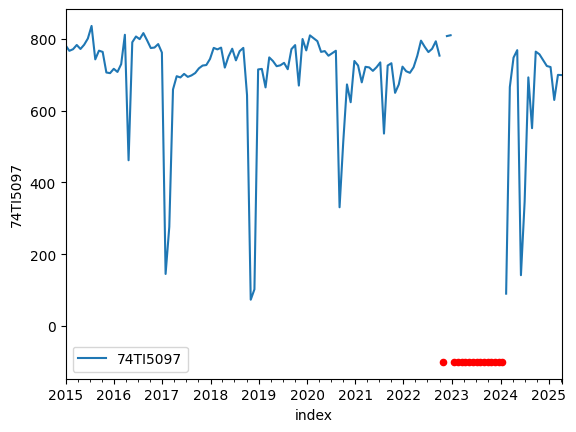

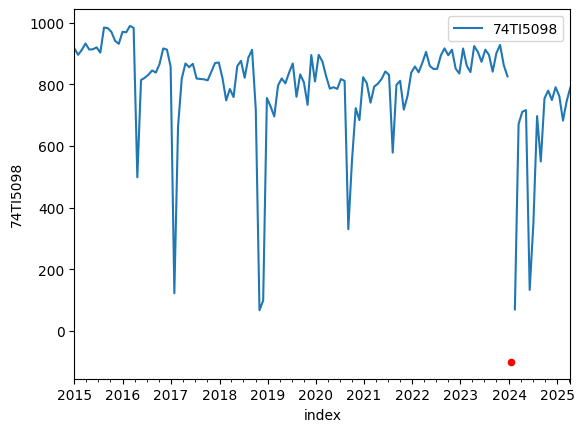

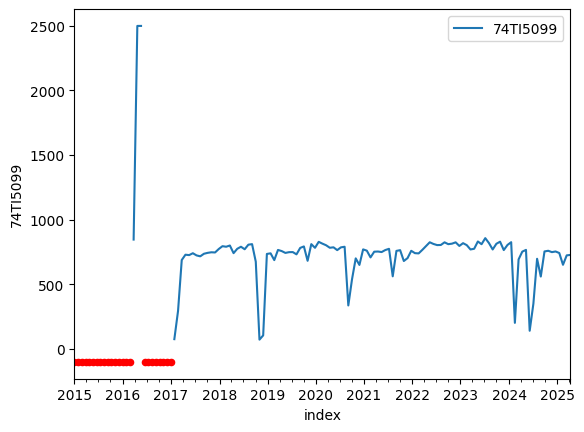

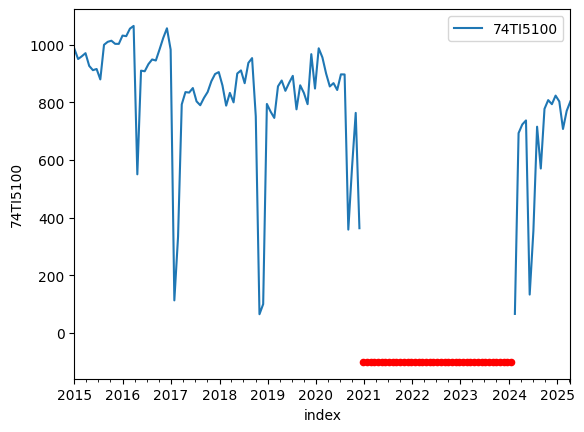

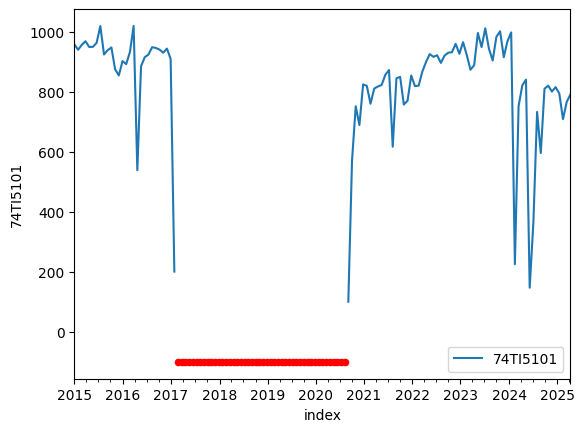

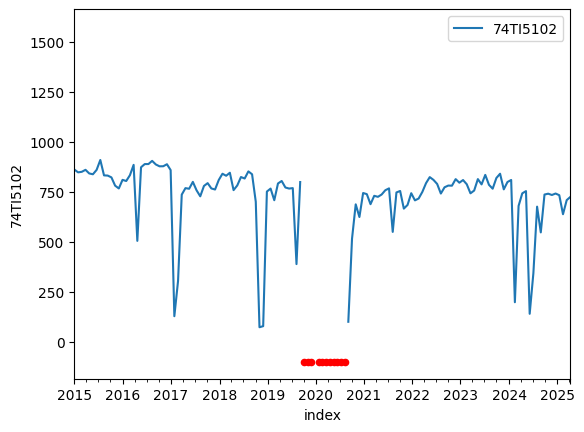

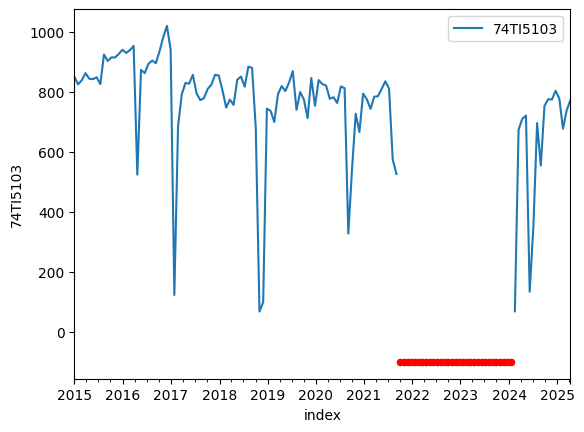

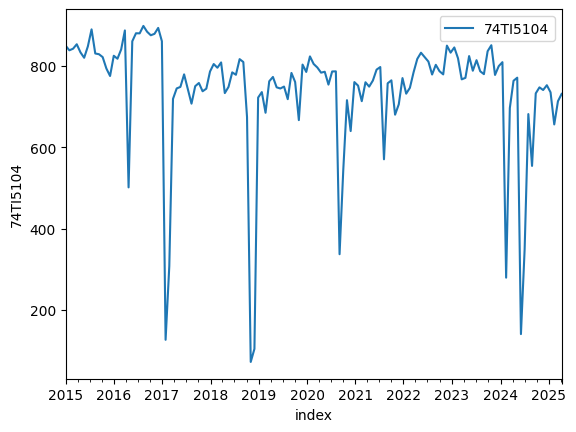

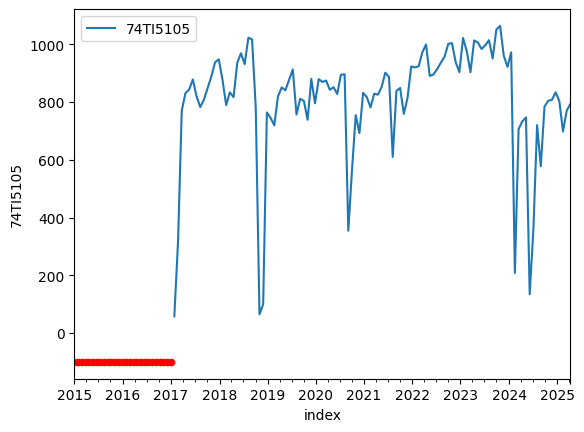

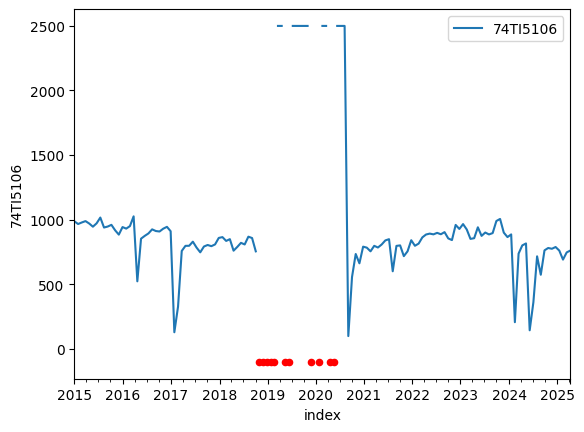

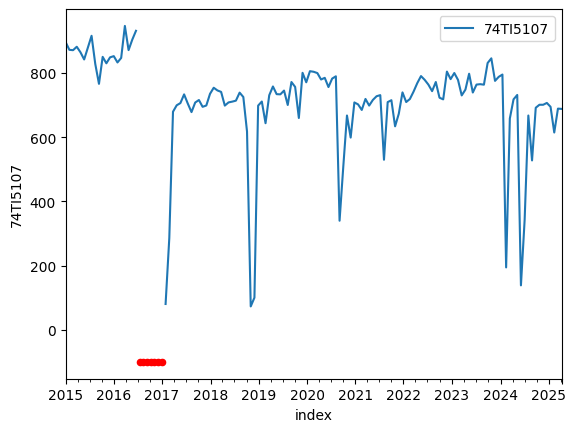

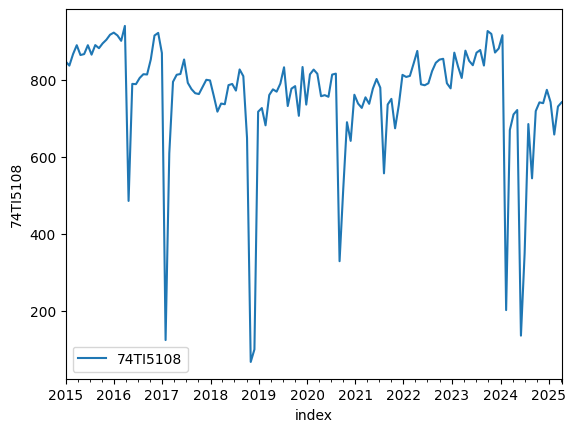

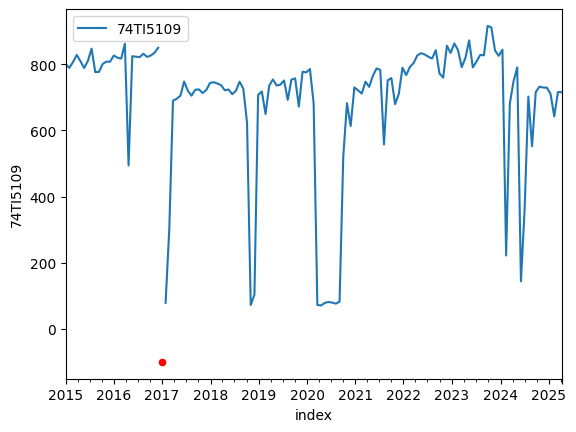

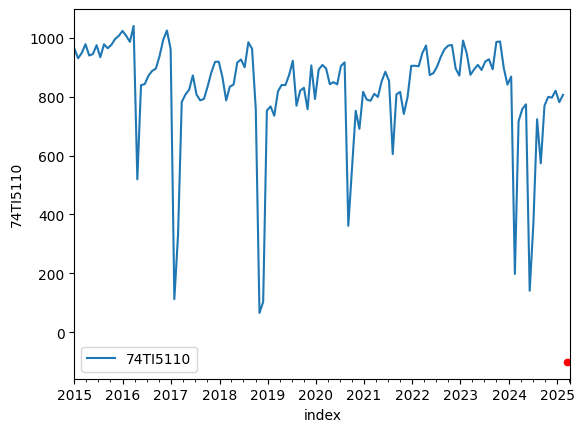

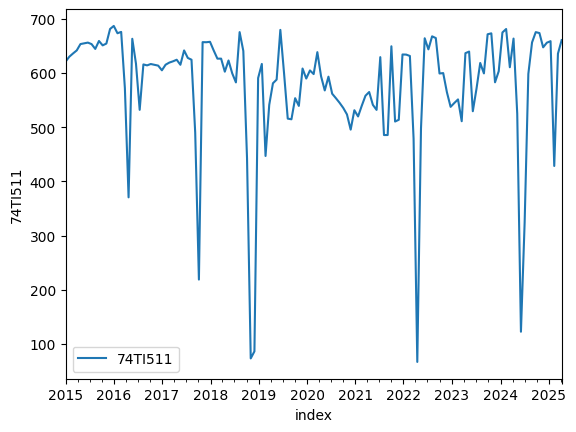

In [14]:
f_520_tag_list = ['74TI5092', '74TI5093', '74TI5094', '74TI5095', '74TI5096', '74TI5097', '74TI5098', '74TI5099', 
                  '74TI5100', '74TI5101', '74TI5102', '74TI5103', '74TI5104', '74TI5105', '74TI5106', '74TI5107',
                  '74TI5108', '74TI5109', '74TI5110', '74TI511']
for tag_num in f_520_tag_list:
    failures, years = eval_failures(tag_num, start_date, end_date, sampling_rate)
    print(f"For tag {tag_num} there are {failures} failures in {years:.1f} years")

For tag 72TI4111 there are 4 failures in 10.3 years
For tag 72TI4112 there are 2 failures in 10.3 years
For tag 72TI4113 there are 0 failures in 10.3 years
For tag 72TI4114 there are 1 failures in 10.3 years
For tag 72TI4115 there are 1 failures in 10.3 years
For tag 72TI4116 there are 1 failures in 10.3 years
For tag 72TI4117 there are 5 failures in 10.3 years
For tag 72TI4118 there are 0 failures in 10.3 years
For tag 72TI4119 there are 6 failures in 10.3 years
For tag 72TI4120 there are 0 failures in 10.3 years
For tag 72TI4121 there are 0 failures in 10.3 years
For tag 72TI4122 there are 0 failures in 10.3 years
For tag 72TI4123 there are 0 failures in 10.3 years
For tag 72TI4124 there are 0 failures in 10.3 years
For tag 72TI4125 there are 0 failures in 10.3 years
For tag 72TI4126 there are 1 failures in 10.3 years
For tag 72TI4127 there are 0 failures in 10.3 years
For tag 72TI4128 there are 0 failures in 10.3 years
For tag 72TI4129 there are 2 failures in 10.3 years
For tag 72TI

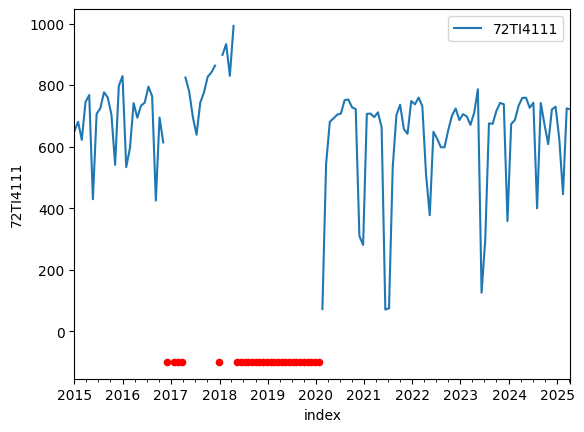

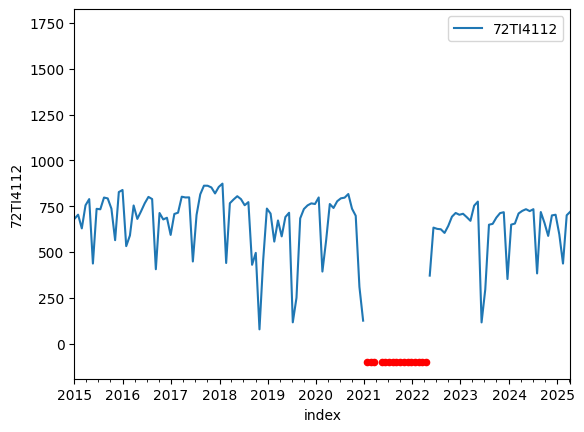

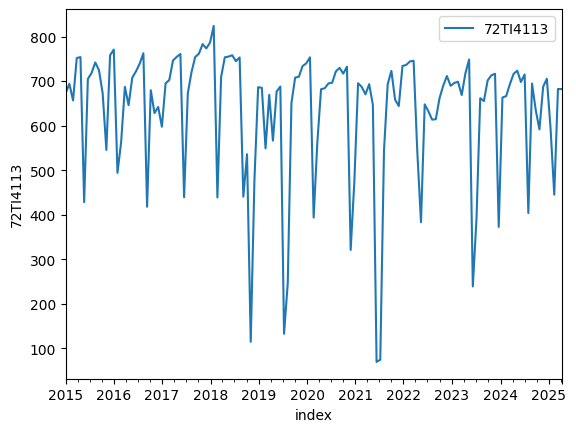

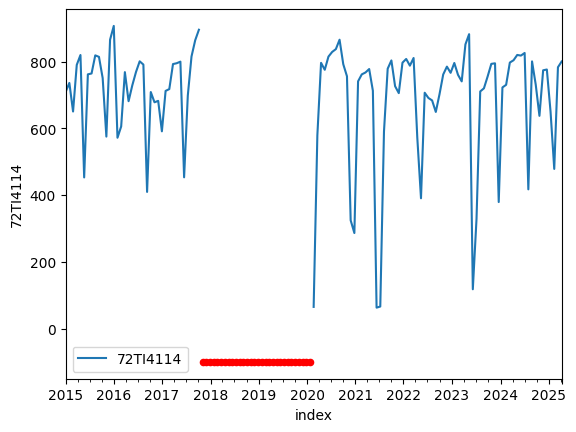

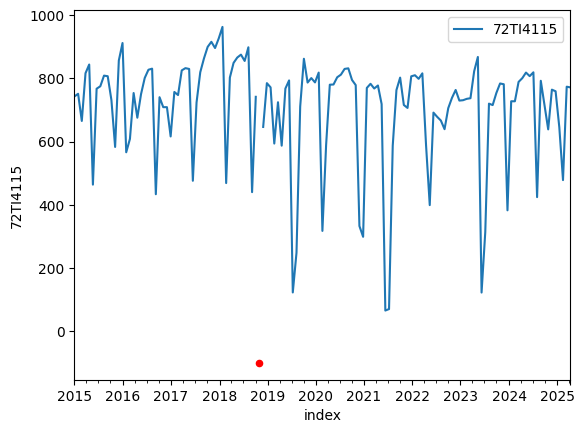

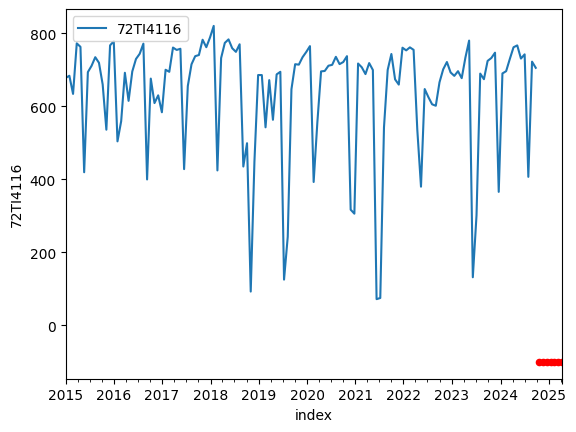

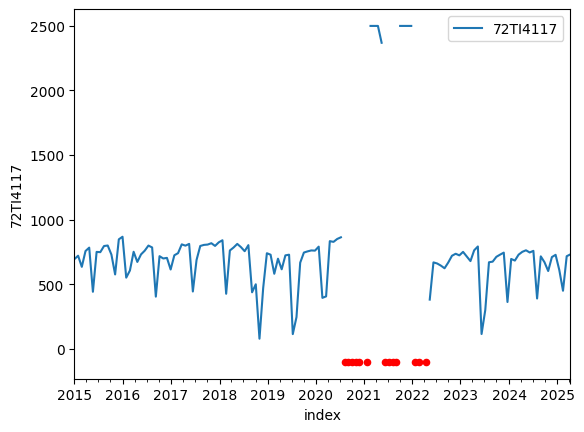

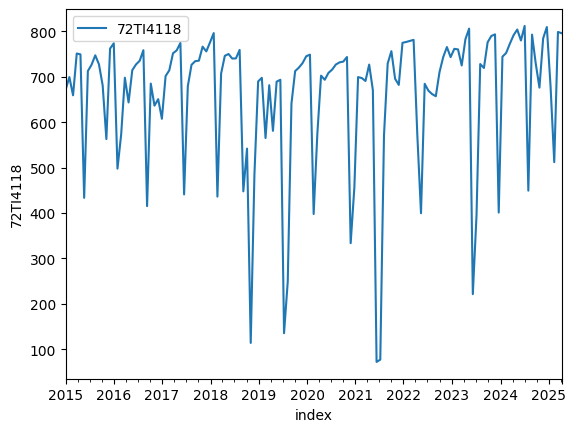

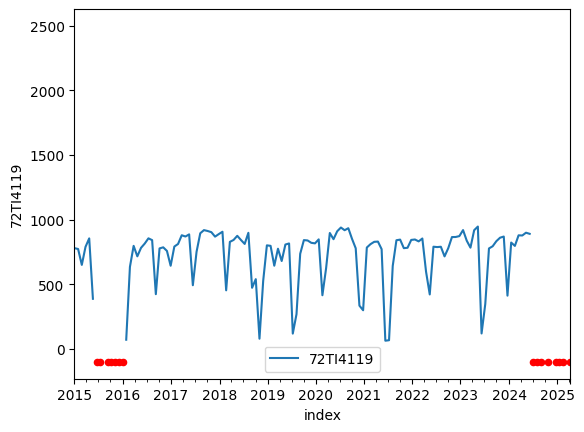

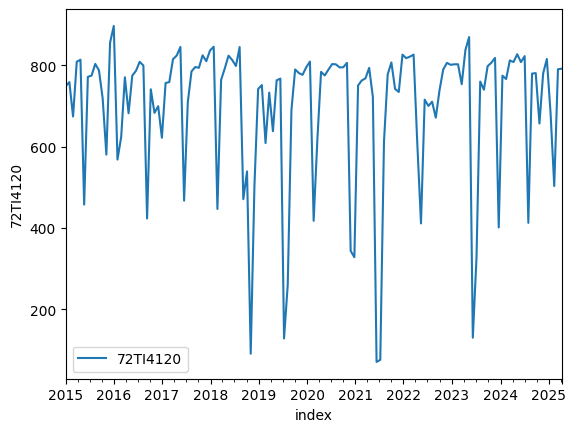

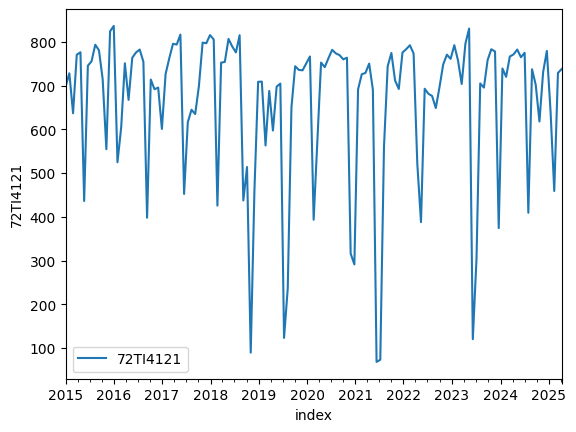

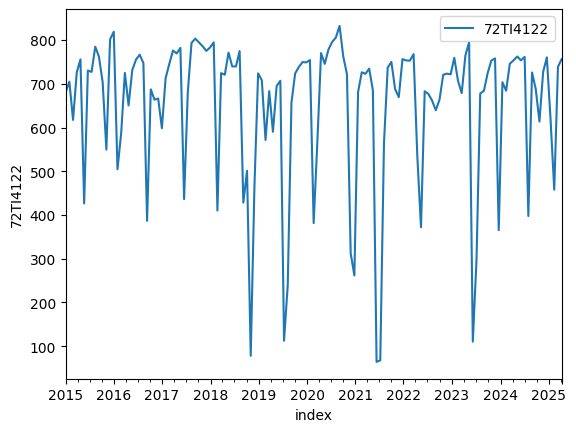

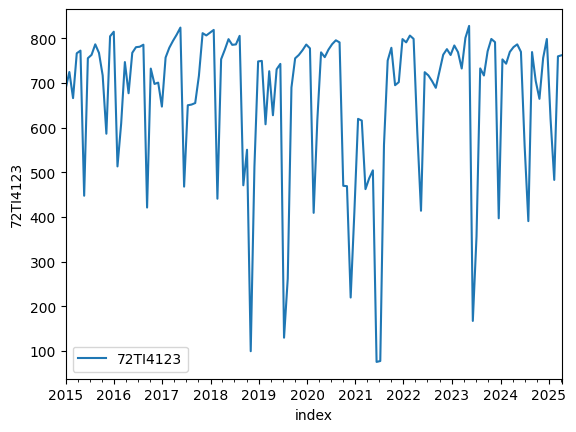

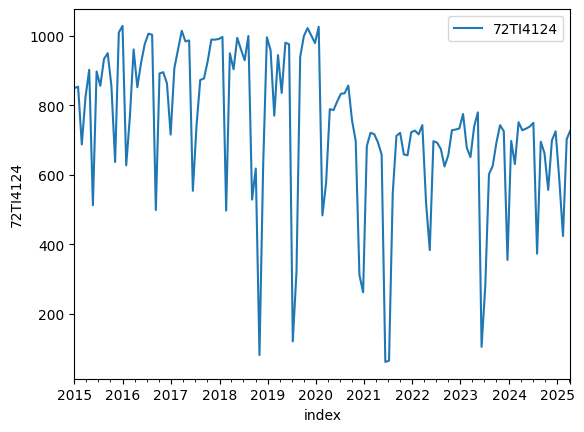

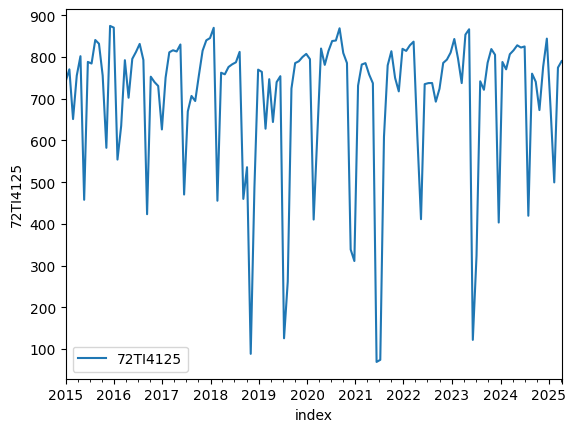

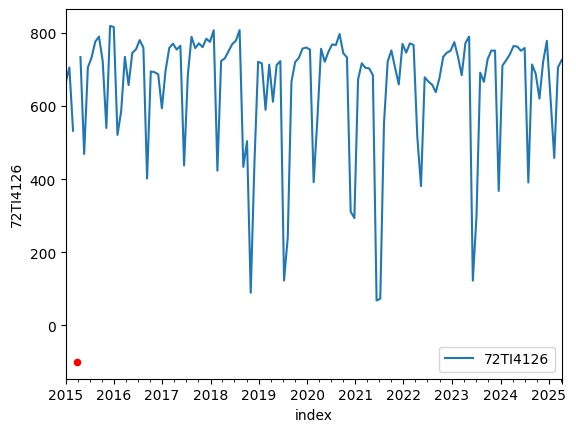

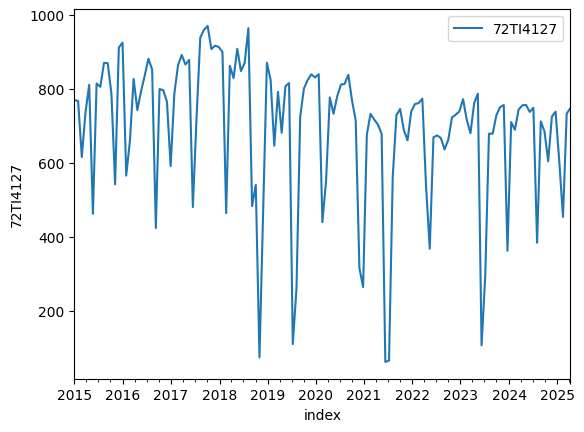

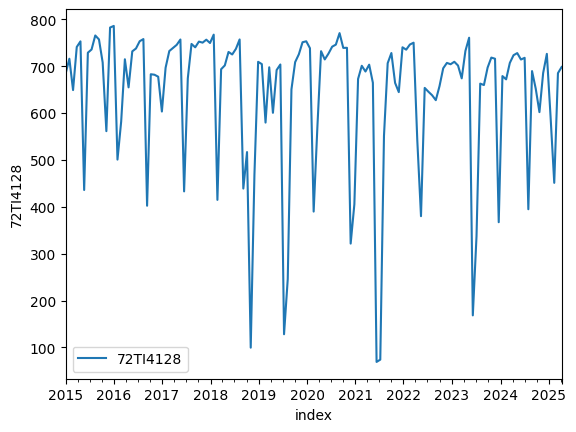

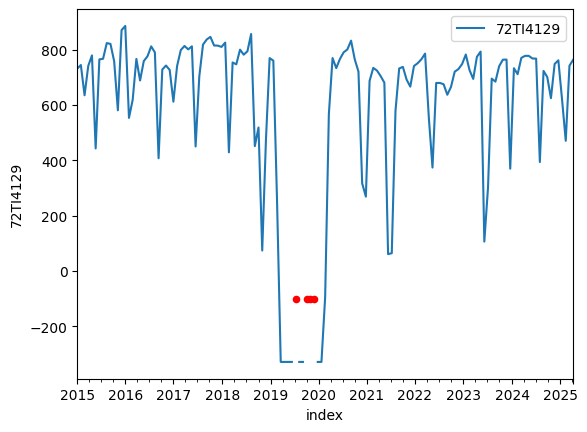

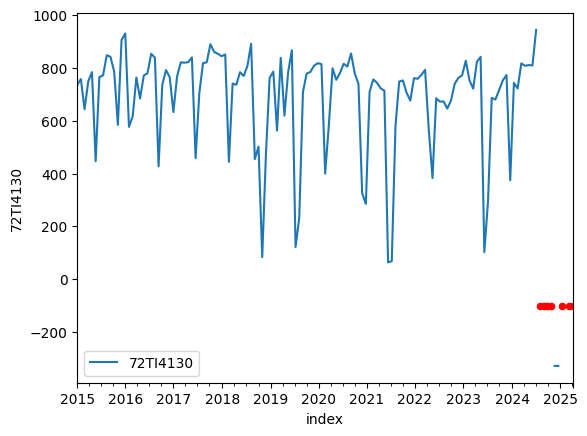

In [ ]:
f_410_tag_list = ['72TI4111', '72TI4112', '72TI4113', '72TI4114', '72TI4115', '72TI4116', '72TI4117', '72TI4118', 
                  '72TI4119', '72TI4120', '72TI4121', '72TI4122', '72TI4123', '72TI4124', '72TI4125', '72TI4126',
                  '72TI4127', '72TI4128', '72TI4129', '72TI4130']
start_date = '2015-01-01'
end_date = str(today)#'2025-02-01'
sampling_rate = '4W'

failure_list = []
years_list = []

for tag_num in f_410_tag_list:
    failures, years = eval_failures(tag_num, start_date, end_date, sampling_rate)
    print(f"For tag {tag_num} there are {failures} failures in {years:.1f} years")
    
    # haven't run the following yet
    failure_list.append(failures)
    years_list.append(years)

In [ ]:
# haven't run this yet!
for index, value in enumerate(f_410_tag_list):
    print(f"For tag {f_410_tag_list[index]} there are {failure_list[index]} failures in {years_list[index]:.1f} years")

print(f'for an average of {sum(f_410_tag_list) / len(f_410_tag_list)}')

# Tools and Packages
- Pyton programming
  + Jupyter Notebook
  + VSCode
- Pandas
- Seeq data processing (SPY)
- Matplotlib for plotting